In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

print(tf.__version__)

2.9.2


In [ ]:
!wget "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
!unzip "/content/rockpaperscissors.zip"

In [3]:
os.listdir("/content/rockpaperscissors")

['README_rpc-cv-images.txt', 'scissors', 'rock', 'rps-cv-images', 'paper']

In [4]:
os.listdir("/content/rockpaperscissors/rps-cv-images")

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper']

In [5]:
base_dir = "/content/rockpaperscissors/rps-cv-images"

train_ds = image_dataset_from_directory(
    directory=base_dir,
    image_size=(150, 150),
    validation_split=0.4,
    subset='training',
    batch_size=32,
    label_mode='categorical',
    seed=1234
)

Found 2188 files belonging to 3 classes.
Using 1313 files for training.


In [6]:
validation_ds = image_dataset_from_directory(
    directory=base_dir,
    image_size=(150, 150),
    validation_split=0.4,
    subset='validation',
    batch_size=32,
    label_mode='categorical',
    seed=1234
)

Found 2188 files belonging to 3 classes.
Using 875 files for validation.


In [7]:
class_names = train_ds.class_names

In [8]:
for image_batch, labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 150, 150, 3)
(32, 3)


In [9]:
image_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.2)
], name='image_augmentation')

In [10]:
train_ds = train_ds.map(
    lambda x, y: (image_augmentation(x), y)
)

In [11]:
validation_ds = validation_ds.map(
    lambda x, y: (image_augmentation(x), y)
)

In [12]:
input_layer = tf.keras.layers.Input(shape=(150, 150, 3))
x = tf.keras.layers.Conv2D(16, 3, activation=tf.nn.relu)(input_layer)
x = tf.keras.layers.MaxPool2D(2, 2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation=tf.nn.relu)(x)
x = tf.keras.layers.MaxPool2D(2, 2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)(x)
output_layer = tf.keras.layers.Dense(units=3, activation=tf.nn.softmax)(x)


sec_cnn_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [13]:
sec_cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
filepath = "/content/model_save"

class MainCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.88 and logs.get('val_accuracy') >= 0.90:
      self.model.stop_training = True

callbacks = MainCallbacks()

In [15]:
history = sec_cnn_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs = 15,
    callbacks=[callbacks],
    verbose=2
)

Epoch 1/15
42/42 - 16s - loss: 1.3261 - accuracy: 0.4326 - val_loss: 0.9238 - val_accuracy: 0.5189 - 16s/epoch - 390ms/step
Epoch 2/15
42/42 - 8s - loss: 0.8568 - accuracy: 0.6314 - val_loss: 0.7317 - val_accuracy: 0.7371 - 8s/epoch - 180ms/step
Epoch 3/15
42/42 - 8s - loss: 0.6573 - accuracy: 0.7555 - val_loss: 0.5881 - val_accuracy: 0.7600 - 8s/epoch - 187ms/step
Epoch 4/15
42/42 - 8s - loss: 0.5258 - accuracy: 0.8012 - val_loss: 0.6905 - val_accuracy: 0.7120 - 8s/epoch - 179ms/step
Epoch 5/15
42/42 - 8s - loss: 0.4774 - accuracy: 0.8195 - val_loss: 0.4705 - val_accuracy: 0.8103 - 8s/epoch - 181ms/step
Epoch 6/15
42/42 - 8s - loss: 0.3930 - accuracy: 0.8492 - val_loss: 0.3758 - val_accuracy: 0.8697 - 8s/epoch - 180ms/step
Epoch 7/15
42/42 - 8s - loss: 0.3671 - accuracy: 0.8637 - val_loss: 0.3217 - val_accuracy: 0.8891 - 8s/epoch - 180ms/step
Epoch 8/15
42/42 - 8s - loss: 0.3582 - accuracy: 0.8743 - val_loss: 0.3738 - val_accuracy: 0.8663 - 8s/epoch - 179ms/step
Epoch 9/15
42/42 - 8s 

In [16]:
train = sec_cnn_model.evaluate(train_ds, verbose=0)[-1]
valid = sec_cnn_model.evaluate(validation_ds, verbose=0)[-1]

print(f"train : {train}, test : {valid}")

train : 0.9383091926574707, test : 0.9074285626411438


--2023-01-20 10:17:55--  https://raw.githubusercontent.com/Blacklst-Interntl/Blacklist/main/ml_plot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1537 (1.5K) [text/plain]
Saving to: ‘ml_plot.py’

ml_plot.py          100%[===================>]   1.50K  --.-KB/s    in 0s      

2023-01-20 10:17:56 (21.9 MB/s) - ‘ml_plot.py’ saved [1537/1537]



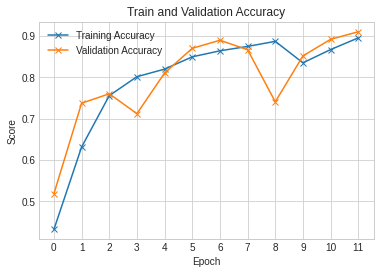

In [17]:
!wget "https://raw.githubusercontent.com/Blacklst-Interntl/Blacklist/main/ml_plot.py"

from ml_plot import History

model_plot = History(history)
model_plot.acc_plot()

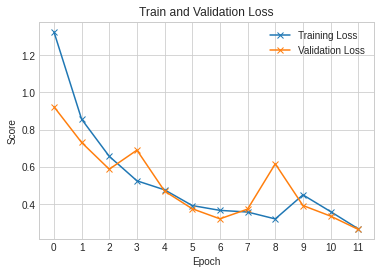

In [18]:
model_plot.loss_plot()